In [449]:
import numpy as np
import pybbtd.covll1 as covll1
import pybbtd as pybbtd
from pybbtd.visualization import draw_metrics

In [412]:
# Create Cov-LL1 model
R = 2
L1 = 5
L2 = 2

# Define spatial dimensions N1 and N2, and covariance dimension (N3 x N3), which gives N3^2 for Cov-LL1
N1, N2, N3 = 20, 20, 2
dims = (N1, N2, N3**2)

X = covll1.CovLL1(dims, R=R, L1=L1, L2=L2, block_mode="LL1")

Sufficient condition for uniqueness satisfied
Cov-LL1 tensor initialized with dimensions (20, 20, 4) on LL1 mode.


In [445]:
# Create ground truth tensor
[A0, B0, C0], T0 = X.generate_covll1_tensor()
Tnoisy = T0 + 1 * 1e-6 * np.random.randn(*X.dims)

In [446]:
covll1.validate_cov_matrices(Tnoisy)

All pixels carry valid covariance matrices.


In [447]:
np.random.seed(10)

X.fit(
    data=Tnoisy,
    algorithm="ADMM",
    init="kmeans",
    max_iter=10000,
    rho=1,
    max_admm=50,
    rel_tol=10**-6,
    abs_tol=10**-12,
    admm_tol=10**-8,
)

Progress: 20.0 %
Progress: 40.0 %
Exiting early due to unsufficient decrease of cost


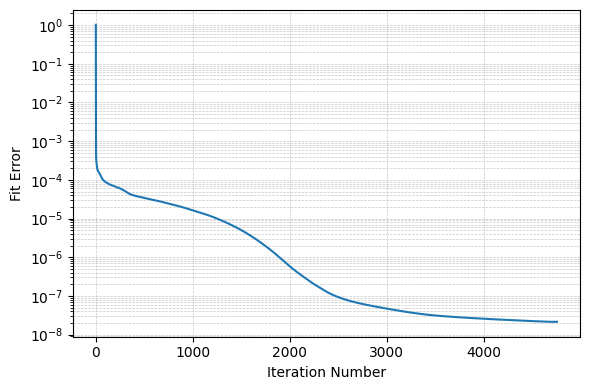

In [448]:
draw_metrics.plot_error(X.fit_error)